In [1]:
#Description: This program detects/predicts if a person has diabetes (1) or not (0)

#Data: https://www.kaggle.com/uciml/pima-indians-diabetes-database

'''
The pima-indians-diabetes data set comes from the Pima people.
The Pima are a group of Native Americans living in an area consisting of what is now central and southern Arizona. 
Thy have the highest reported prevalence of diabetes of any population in the world, 
and have contributed to numerous scientific gains through their willingness to participate in some research. 
Their involvement has led to significant findings with regard to the epidemiology, physiology,
clinical assessment, and genetics of both type 2 diabetes and obesity. - National Center for Biotechnology Information
'''

'\nThe data set comes from the Pima people.\nThe Pima are a group of Native Americans living in an area consisting of what is now central and southern Arizona. \nThe Pima have the highest reported prevalence of diabetes of any population in the world, \nand have contributed to numerous scientific gains through their willingness to participate in the research process. \nTheir involvement has led to significant findings with regard to the epidemiology, physiology,\nclinical assessment, and genetics of both type 2 diabetes and obesity.\u200a-\u200aNational Center for Biotechnology Information\n'

In [2]:
#Load libraries
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Using TensorFlow backend.


In [3]:
#Load the data
from google.colab import files # Use to load data on Google Colab
uploaded = files.upload() # Use to load data on Google Colab

Saving diabetes.csv to diabetes.csv


In [4]:
#Store the data set
df = pd.read_csv('diabetes.csv')

#Look at first 7 rows of data
df.head(7)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1


In [5]:
#Show the shape (number of rows & columns)
df.shape

(768, 9)

In [0]:
#Checking for duplicates and removing them
df.drop_duplicates(inplace = True)

In [7]:
#Show the shape to see if any rows were dropped (number of rows & columns)
df.shape

(768, 9)

In [8]:
#Show the number of missing (NAN, NaN, na) data for each column
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
#Convert the data into an array
dataset = df.values
dataset

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [0]:
# Get all of the rows from the first eight columns of the dataset
X = dataset[:,0:8] #X = dataset[:,0:8]   #X = df.iloc[:, 0:8] 
# Get all of the rows from the last column
y = dataset[:,8] #y = dataset[:,8]     #y = df.iloc[:, 8] 


In [11]:
#Process the data
#the min-max scaler method scales the dataset so that all the input features lie between 0 and 1 inclusive
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [0]:
#Split the data into 80% training and 20%

#train_test_split splits arrays or matrices into random train and test subsets. 
#That means that everytime you run it without specifying random_state, you will get a different result, this is expected behavior.
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.2, random_state = 4)

In [14]:

#Build the model and architecture of the neural network

# The models architechture 3 layers,
# 1st layer with 12 neurons and activation function 'relu'
# 2nd layer with 15 neurons and activation function 'relu'
# the last layer has 1 neuron with an activation function = sigmoid function which returns a value btwn 0 and 1
# The input shape/ input_dim = 8 the number of features in the data set
model = Sequential([
    Dense(12, activation='relu', input_shape=( 8 ,)),
    Dense(15, activation='relu'),
    Dense(1, activation='sigmoid')
])




W0809 22:31:06.408399 139911896921984 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0809 22:31:06.460541 139911896921984 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0809 22:31:06.471525 139911896921984 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [15]:
# Loss measuers how well the model did on training , and then tries to improve on it using the optimizer
model.compile(optimizer='sgd', #Stochastic gradient descent optimizer.
              loss='binary_crossentropy', #Used for binary classification
              metrics=['accuracy'])

W0809 22:31:09.226096 139911896921984 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0809 22:31:09.256962 139911896921984 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0809 22:31:09.266288 139911896921984 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [16]:
#Train the model

# Split the data into 20% validation data
hist = model.fit(X_train, y_train,
          batch_size=57, epochs=1000, validation_split=0.2)

W0809 22:31:11.499556 139911896921984 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 491 samples, validate on 123 samples
Epoch 1/1000
491/491 [==============================] - 1s 1ms/step - loss: 0.6683 - acc: 0.6477 - val_loss: 0.6709 - val_acc: 0.6504
Epoch 2/1000
491/491 [==============================] - 0s 37us/step - loss: 0.6667 - acc: 0.6477 - val_loss: 0.6696 - val_acc: 0.6504
Epoch 3/1000
491/491 [==============================] - 0s 32us/step - loss: 0.6655 - acc: 0.6477 - val_loss: 0.6683 - val_acc: 0.6504
Epoch 4/1000
491/491 [==============================] - 0s 31us/step - loss: 0.6644 - acc: 0.6477 - val_loss: 0.6671 - val_acc: 0.6504
Epoch 5/1000
491/491 [==============================] - 0s 37us/step - loss: 0.6633 - acc: 0.6477 - val_loss: 0.6660 - val_acc: 0.6504
Epoch 6/1000
491/491 [==============================] - 0s 39us/step - loss: 0.6622 - acc: 0.6477 - val_loss: 0.6650 - val_acc: 0.6504
Epoch 7/1000
491/491 [==============================] - 0s 34us/step - loss: 0.6614 - acc: 0.6477 - val_loss: 0.6643 - val_acc: 0.6504
Epoch 8/10

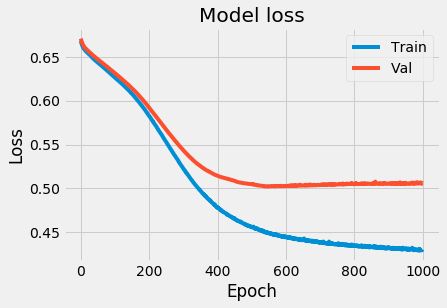

In [17]:
#visualize the training loss and the validation loss to see if the model is overfitting
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

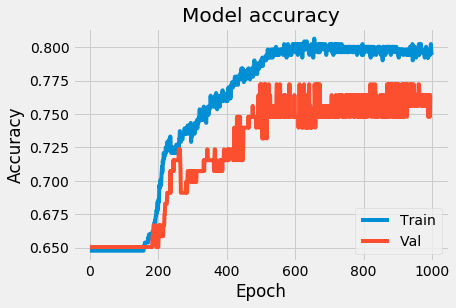

In [18]:
#visualize the training accuracy and the validation accuracy to see if the model is overfitting
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [19]:
#Make a prediction & print the actual values
prediction = model.predict(X_test)
prediction  = [1 if y>=0.5 else 0 for y in prediction] #Threshold
print(prediction)
print(y_test)

[0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1]
[0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 1. 1. 1. 0. 0. 0. 0. 0. 1. 1.]


In [20]:
#Evaluate the model on the training data set
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
pred = model.predict(X_train)
pred  = [1 if y>=0.5 else 0 for y in pred] #Threshold
print(classification_report(y_train ,pred ))
print('Confusion Matrix: \n',confusion_matrix(y_train,pred))
print()
print('Accuracy: ', accuracy_score(y_train,pred))
print()

#Print the predictions
#print('Predicted value: ',model.predict(X_train))

#Print Actual Label
#print('Actual value: ',y_train)

              precision    recall  f1-score   support

         0.0       0.81      0.87      0.84       398
         1.0       0.73      0.63      0.68       216

    accuracy                           0.79       614
   macro avg       0.77      0.75      0.76       614
weighted avg       0.79      0.79      0.79       614

Confusion Matrix: 
 [[348  50]
 [ 79 137]]

Accuracy:  0.7899022801302932



In [21]:
#Evaluate the model on the test data set
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
pred = model.predict(X_test)
pred  = [1 if y>=0.5 else 0 for y in pred] #Threshold
print(classification_report(y_test ,pred ))
print('Confusion Matrix: \n',confusion_matrix(y_test,pred))
print()
print('Accuracy: ', accuracy_score(y_test,pred))
print()

#Print the predictions
#print('Predicted value: ',model.predict(X_test))

#Print Actual Label
#print('Actual value: ',y_test)

              precision    recall  f1-score   support

         0.0       0.83      0.80      0.82       102
         1.0       0.64      0.67      0.65        52

    accuracy                           0.76       154
   macro avg       0.73      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154

Confusion Matrix: 
 [[82 20]
 [17 35]]

Accuracy:  0.7597402597402597



In [22]:
#Evaluate the test data set

#The reason why we have the index 1 after the model.evaluate function is because
#the function returns the loss as the first element and the accuracy as the 
#second element. To only output the accuracy, simply access the second element 
#(which is indexed by 1, since the first element starts its indexing from 0).
model.evaluate(X_test, y_test)[1]   

154/154 [==============================] - 0s 109us/step


0.7597402566439145